In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

In [3]:
tf.__version__

'2.0.0'

In [4]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [244]:
def compare_model_label(model, inputs, ab):
    plt.figure(figsize=(10, 30))
#     print(inputs[1])
    l = inputs[0]
#     print(np.array([l], dtype=float))

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    plt.subplot(1,3,3)
#     output = model.predict(np.array([l, inputs[1]], dtype=float))
#     print(np.array(np.array([l]), inputs[1]))
    print(l.shape, inputs[1].shape)
    output = model.predict( [ np.expand_dims(l, axis=0), np.expand_dims(inputs[1], axis=0) ] )

#     output = model.predict([[np.array([l]), inputs[1]]])
    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

In [216]:
def inception_embedding(img):
    rgb_img = color.gray2rgb(color.rgb2gray(img))
    rgb_img_resize = resize(rgb_img, (299, 299, 3), mode='constant')
    rgb_img_resize = np.array([rgb_img_resize])
    rgb_img_resize = preprocess_input(rgb_img_resize)
    embed = inception.predict(rgb_img_resize)
    return embed[0]

# Training

In [6]:
from src.model.train_model import train_model
from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c
TensorBoard(log_dir='/output')
model = train_model()

train images size 8366, valid images size 464, batch_size 16
Train for 1 steps, validate for 1 steps
Epoch 1/20
1/1 [==============================] - 35s 35s/step - loss: 0.0093 - accuracy: 0.4528 - val_loss: 0.0172 - val_accuracy: 0.6461
Epoch 2/20
1/1 [==============================] - 24s 24s/step - loss: 0.0084 - accuracy: 0.5461 - val_loss: 0.0176 - val_accuracy: 0.6542
Epoch 3/20
1/1 [==============================] - 26s 26s/step - loss: 0.0088 - accuracy: 0.5454 - val_loss: 0.0168 - val_accuracy: 0.6572
Epoch 4/20
1/1 [==============================] - 24s 24s/step - loss: 0.0083 - accuracy: 0.5455 - val_loss: 0.0180 - val_accuracy: 0.6541
Epoch 5/20
1/1 [==============================] - 24s 24s/step - loss: 0.0100 - accuracy: 0.5464 - val_loss: 0.0173 - val_accuracy: 0.6543
Epoch 6/20
1/1 [==============================] - 24s 24s/step - loss: 0.0085 - accuracy: 0.5464 - val_loss: 0.0175 - val_accuracy: 0.6542
Epoch 7/20
1/1 [==============================] - 24s 24s/step - 

In [7]:
print(train_model)

<function train_model at 0x7f4ea8bf8200>


In [8]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [9]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 4s 767ms/step - loss: 0.0159 - accuracy: 0.4276


[0.015869684936478733, 0.42764282]

In [10]:
train_gen = image_generator(train_paths)
test_gen = image_generator(test_paths)

## Images from Train set

(256, 256, 1) (1000,)


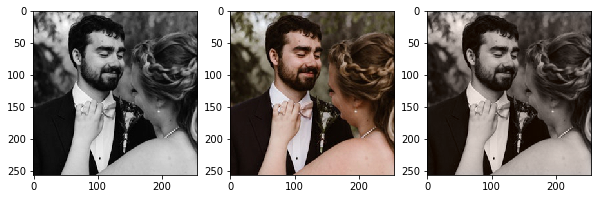

(256, 256, 1) (1000,)


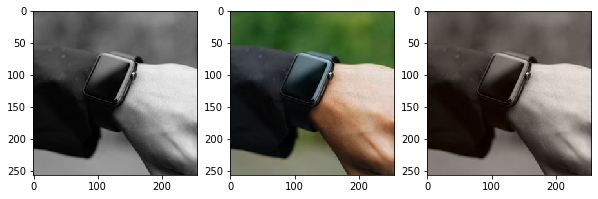

(256, 256, 1) (1000,)


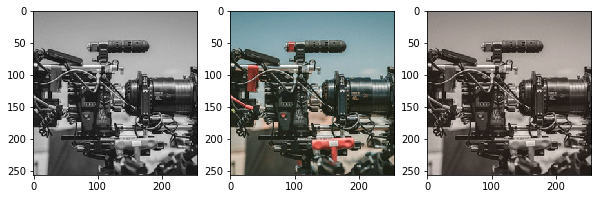

In [ ]:
for i in range(5):
    inputs, ab = next(train_gen)
    compare_model_label(model, inputs, ab)

## Images from Test set

ValueError: Error when checking input: expected input_2 to have shape (1000,) but got array with shape (1,)

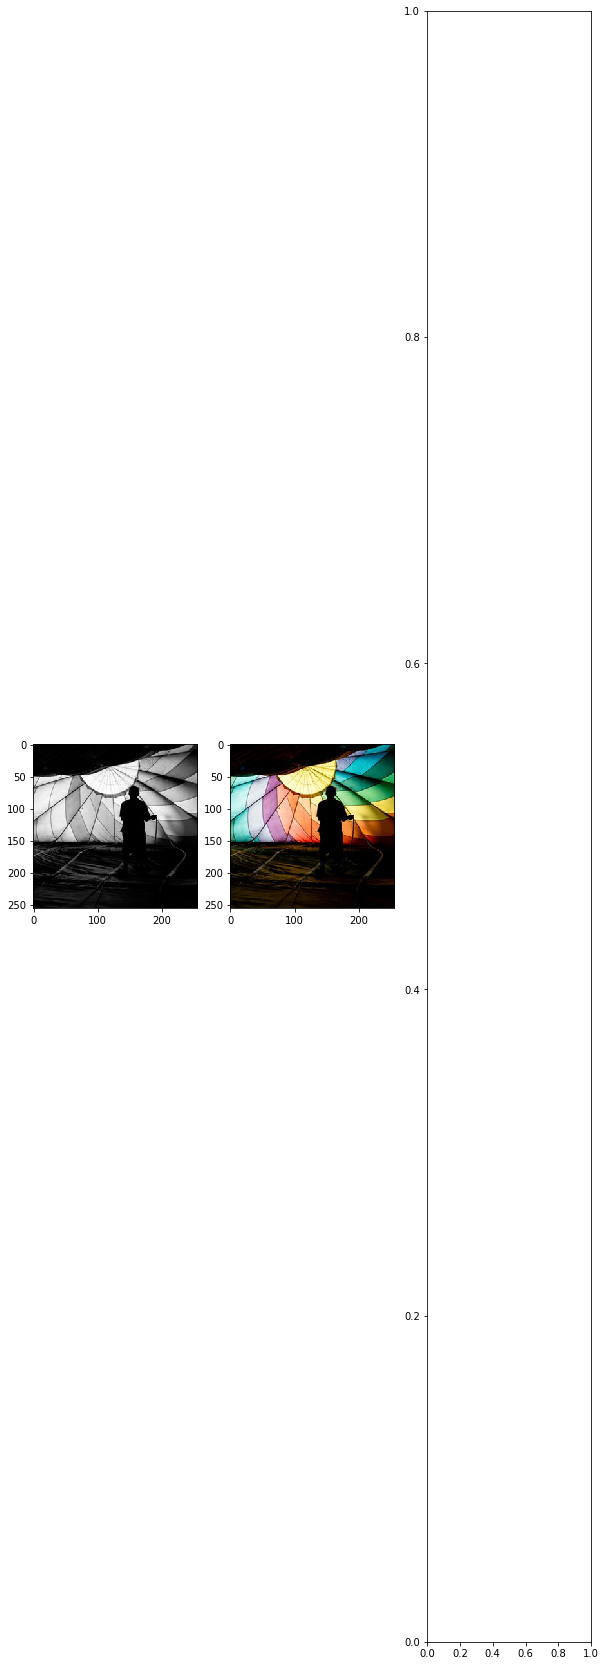

In [189]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)